In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [24]:
X_train_1 =pd.read_csv("../data/X_train_part1.csv", index_col = "index")
X_train_2 =pd.read_csv("../data/X_train_part2.csv", index_col = "index")
X_train_3 =pd.read_csv("../data/X_train_part3.csv", index_col = "index")
X_train = pd.concat([X_train_1,X_train_2,X_train_3])
y_train = pd.read_csv("../data/y_train.csv", index_col = "index")

X_test =pd.read_csv("../data/X_test.csv", index_col = "index")
y_test = pd.read_csv("../data/y_test.csv", index_col = "index")

X_train_removed = pd.read_csv("../data/X_train_removed.csv",index_col = "index")
X_test_removed = pd.read_csv("../data/X_test_removed.csv",index_col = "index")


In [25]:
# Transfroming 'month' to 'year'

X_train['year'] = pd.to_datetime(X_train['month']).dt.year
X_train_removed['time'] = X_train['month']
X_train = X_train.drop(columns = ['month'])

X_test['year'] = pd.to_datetime(X_test['month']).dt.year
X_test_removed['time'] = X_test['month']
X_test = X_test.drop(columns = ['month'])

# Random forest


In [8]:
regressor = RandomForestRegressor()

regressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor()

In [9]:
# Making prediction
prediction_base_train = regressor.predict(X_train)

## Performance of base model

In [12]:
r2_base_train = r2_score(prediction_base_train, y_train)
print(f'R2 score for base model (Train): {r2_base_train}')

R2 score for base model (Train): 0.9949900280088885


Extremely high. Check for overfitting.

In [26]:
prediction_base_test = regressor.predict(X_test)

r2_base_test = r2_score(prediction_base_test, y_test)

print(f'R2 score for base model (Test): {r2_base_test}')

R2 score for base model (Test): 0.9756269846178377


In [ ]:
# Code to visulise a particular tree
tree_to_plot = regressor.estimators_[0] # first tree

fig, ax = plt.subplots(figsize = (30,20))
plot_tree(tree_to_plot, feature_names = X_train.columns.tolist(), 
          filled = True, rounded = True, max_depth = 3)
ax.set_title(label = "First tree")
plt.show()

## Checking feature importance

<Axes: >

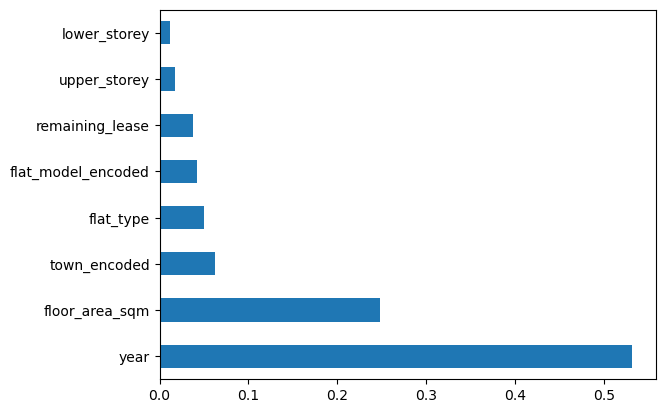

In [30]:
feature_importance = regressor.feature_importances_
features = X_train.columns.tolist()

forest_importance = pd.Series(feature_importance, index = features).sort_values(ascending = False)

forest_importance.head(20).plot(kind = "barh")


Year appears to be the most important factor. We may consider a time-series analysis on this.